# Stochastic Gradient Descent

In [5]:
import torch
from model_samples.utils import generate_data, plot_series, plot_x_y_pred
from model_samples.sgd import SimpleSGDClassifier

In [2]:

# Generate data
input, label = generate_data()

# Make minibatches.
inputs = torch.split(input, 32)
labels = torch.split(label, 32)

classifier = SimpleSGDClassifier(alpha=1, epochs=15)
classifier.fit(inputs, labels)
pred_y, pred_prob = classifier.predict(input)
metrics = classifier.score(pred_y, label)

print()
print(f"Precision: {metrics[0]:.4f}")
print(f"Recall: {metrics[1]:.4f}")
print(f"F1-score: {metrics[2]:.4f}")


Epoch 1 loss: 13.6491
Epoch 2 loss: 13.1076
Epoch 3 loss: 12.5400
Epoch 4 loss: 12.2692
Epoch 5 loss: 12.1197
Epoch 6 loss: 12.0288
Epoch 7 loss: 11.9700
Epoch 8 loss: 11.9300
Epoch 9 loss: 11.9021
Epoch 10 loss: 11.8822
Epoch 11 loss: 11.8678
Epoch 12 loss: 11.8574
Epoch 13 loss: 11.8498
Epoch 14 loss: 11.8443
Epoch 15 loss: 11.8405

Precision: 0.9415
Recall: 0.9085
F1-score: 0.9247


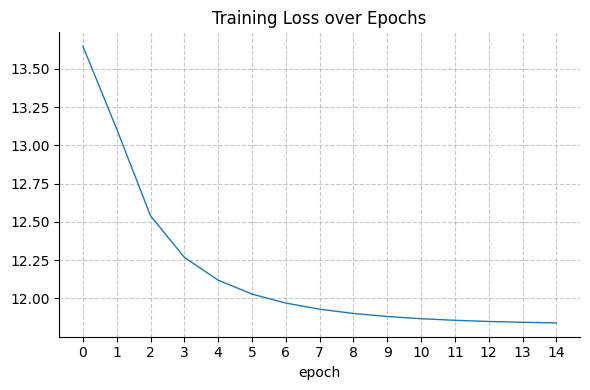

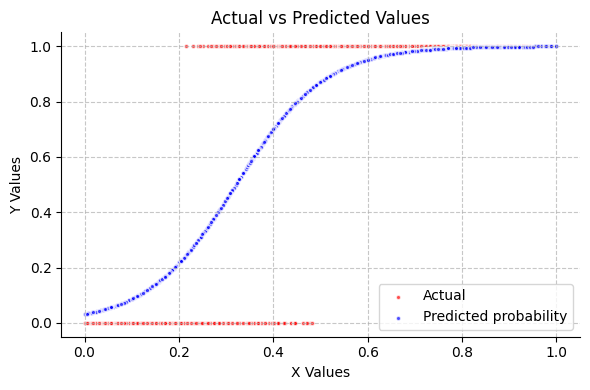

In [6]:
# Plot loss
plot_series(
    [loss.item() for loss in classifier.epoch_losses],
    "Training Loss over Epochs",
    figsize=(6, 4)
)

# Data
plot_x_y_pred(
    x=[num.item() for num in input],
    y=[num.item() for num in label],
    pred=[num.item() for num in pred_prob],
    figsize=(6, 4),
    marker_size=10
)